In [1]:
import os
os.listdir()

['.git',
 '.ipynb_checkpoints',
 'datasets',
 'decisionTree.ipynb',
 'K_NNAlgo.ipynb',
 'linearRegression.ipynb',
 'svmClassifier.ipynb']

In [2]:
# import the required libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# inline the plots

In [5]:
%matplotlib inline

In [6]:
# load the dataset

In [7]:
df=pd.read_csv('./datasets/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [9]:
X=df.iloc[:,2:4].values
X

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [10]:
y=df['Purchased'].values
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [12]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [13]:
X_train

array([[-1.83056897, -1.45220023],
       [-0.65429975, -1.07620266],
       [-1.6345241 , -1.59681469],
       [-1.14441193,  0.25425028],
       [-0.06616514,  0.02286716],
       [-0.06616514,  0.08071294],
       [-0.75232219, -0.64235931],
       [ 0.22790216, -0.35313041],
       [ 1.20812651, -1.01835688],
       [ 1.20812651, -1.48112312],
       [ 0.03185729, -0.00605573],
       [-0.65429975, -0.00605573],
       [ 1.11010408,  0.08071294],
       [ 0.81603677,  0.4856334 ],
       [-1.43847923, -1.24974   ],
       [ 0.3259246 , -0.55559064],
       [ 2.18835086,  0.34101895],
       [-0.06616514, -1.10512555],
       [-1.73254654,  0.31209606],
       [-0.65429975,  0.08071294],
       [-0.36023245, -1.33650867],
       [-1.6345241 ,  0.4856334 ],
       [-0.45825488,  1.20870565],
       [ 1.99230599, -1.39435445],
       [ 0.22790216, -0.00605573],
       [-0.85034462,  0.25425028],
       [-0.16418758, -1.10512555],
       [-1.04638949, -1.16297133],
       [ 1.11010408,

In [14]:
X_test

array([[ 1.01208164, -1.19189422],
       [ 1.20812651, -0.78697376],
       [-0.45825488, -0.87374243],
       [-1.14441193,  1.3533201 ],
       [ 1.69823868, -0.93158821],
       [-0.36023245,  0.02286716],
       [ 0.03185729,  1.17978276],
       [ 0.12987973,  0.10963583],
       [-0.85034462, -0.70020509],
       [ 0.71801434, -1.42327734],
       [-1.24243436,  0.54347918],
       [ 1.40417138,  1.23762854],
       [-1.14441193, -1.19189422],
       [-1.04638949, -0.41097619],
       [-1.83056897, -1.51004601],
       [-0.65429975, -0.15067018],
       [-0.06616514,  2.16316103],
       [ 0.22790216, -0.41097619],
       [-1.92859141,  0.42778762],
       [-0.16418758, -0.55559064],
       [ 1.50219381,  0.02286716],
       [-0.85034462, -1.24974   ],
       [ 1.01208164,  1.93177791],
       [ 1.89428355, -0.32420752],
       [-0.75232219, -1.5678918 ],
       [ 2.09032842,  0.13855872],
       [-0.26221001, -0.46882197],
       [ 2.09032842,  0.34101895],
       [-1.6345241 ,

In [15]:
# Implement SVM classifier

In [16]:
from sklearn.svm import SVC

In [17]:
classifier=SVC(kernel='linear')
classifier.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [18]:
y_predicted=classifier.predict(X_test)
y_predicted

array([1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,y_predicted)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


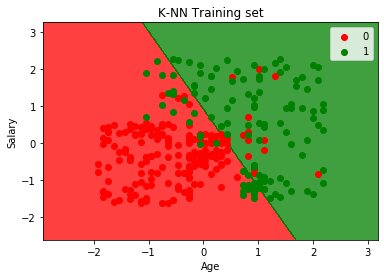

In [20]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_point, y_point = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_point[:, 0].min() - 1, stop = X_point[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_point[:, 1].min() - 1, stop = X_point[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_point)):
    plt.scatter(X_point[y_point == j, 0], X_point[y_point == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN Training set')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()

In [21]:
cm

array([[48,  5],
       [ 6, 21]], dtype=int64)

In [22]:
accuracy_score(y_test,y_predicted)

0.8625